In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import numpy as np
import matplotlib.pyplot as plt
fname="Jelgava_2017-2021_t_p_def.xls"
df=pd.read_excel(fname,parse_dates=["Datums \ Laiks"],index_col=0)
df=df.reindex(columns=["vidējais sniega segas biezums, cm","summa","dienas vidējā temperatūra, C","vidējais relatīvais mitrums"])

###############
window_size=7

##############

for i in range(1, window_size):
    df[f'summa_{i}'] = df['summa'].shift(i)
    df[f'dvt_{i}'] = df['dienas vidējā temperatūra, C'].shift(i)
    df[f'vrm_{i}'] = df['vidējais relatīvais mitrums'].shift(i)
    
df=df.dropna()

X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Create a sequential model
model = Sequential()

model.add(LSTM(64, return_sequences=False, input_shape=(X_train.shape[1], 1)))
# Add layers to the model
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
#model.add(Dense(8, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20, batch_size=32)

test_loss = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)

Epoch 1/20
46/46 [==============================] - 6s 20ms/step - loss: 5.8499 - accuracy: 0.3780
Epoch 2/20
46/46 [==============================] - 1s 19ms/step - loss: 2.8982 - accuracy: 0.8055
Epoch 3/20
46/46 [==============================] - 1s 19ms/step - loss: 2.7917 - accuracy: 0.7918
Epoch 4/20
46/46 [==============================] - 1s 19ms/step - loss: 2.3938 - accuracy: 0.7897
Epoch 5/20
46/46 [==============================] - 1s 19ms/step - loss: 2.3947 - accuracy: 0.8021
Epoch 6/20
46/46 [==============================] - 1s 19ms/step - loss: 2.2970 - accuracy: 0.8062
Epoch 7/20
46/46 [==============================] - 1s 19ms/step - loss: 2.0812 - accuracy: 0.8055
Epoch 8/20
46/46 [==============================] - 1s 19ms/step - loss: 2.0688 - accuracy: 0.8247
Epoch 9/20
46/46 [==============================] - 1s 20ms/step - loss: 1.8461 - accuracy: 0.8186
Epoch 10/20
46/46 [==============================] - 1s 21ms/step - loss: 1.8270 - accuracy: 0.8199
Epoch 11/

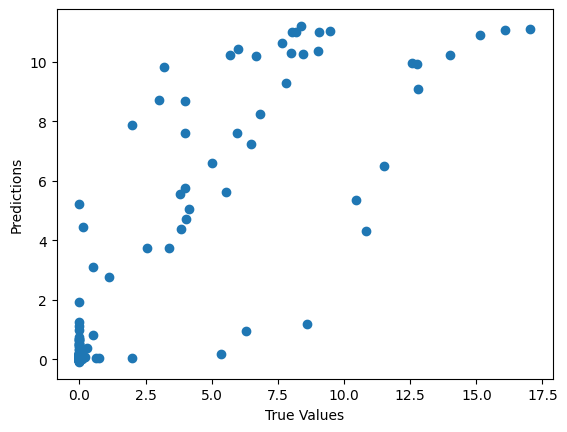

In [23]:
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

57/57 [==============================] - 0s 8ms/step


C:\Users\didzis\AppData\Local\Temp\ipykernel_15664\4156209726.py:4: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  plt.plot(df[["vidējais sniega segas biezums, cm","snowcover_predicted"]]["2017"])


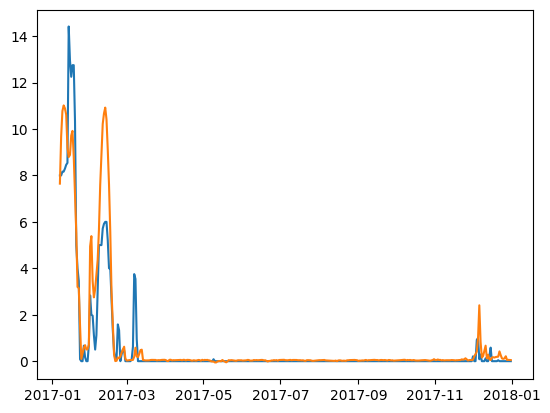

In [24]:
X_test2 = np.reshape(X, (X.shape[0], X.shape[1], 1))
y_pred = model.predict(X_test2)
df["snowcover_predicted"]=y_pred
plt.plot(df[["vidējais sniega segas biezums, cm","snowcover_predicted"]]["2017"])